In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('#toggleButton').val('Show Code')
 } else {
 $('div.input').show();
 $('#toggleButton').val('Show Code')
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" id = "toggleButton" value="Hide Code"></form>''')

In [2]:
# Import relevant libraries
import pandas as pd
import random, numpy
from IPython.display import HTML
from matplotlib import pylab, rc
from matplotlib import pyplot as plt
import random, numpy

# Import functions from lecture notes
%run 'lect8.py'

In [3]:
HTML('<h2> Probability Sampling and Standard Error')

In [4]:
HTML('''
<li> For some experiments, like election polls that involve sampling something real, repeated polls are not possible. 
So we can't create samples by simulation, but Confidence Intervals are generated.
<li> Probability Sampling is when each member of population has non-zero chance of being included in sample. 
<br>

<p><b>Simple Random Sampling: </b></p>
<li> Each member has equal chance of being chosen in sample.
<br>

<p><b>Stratified Sampling: </b></p>
<li> Suppose we are sampling to check what % students at MIT are nerds and we see 60%.
If Engineering major has most students and possibly all nerds observed are from engineering and so there is a bias.
<li> Stratified Sampling would imply we take simple random samples from each sub-group.

     
     ''')

In [5]:
temps_df = pd.read_csv('temperatures.csv')

In [6]:
HTML('''
<hr>

Let's look at the distribution of a random sample drawn from the temperatures dataset and compare it to the population

''')

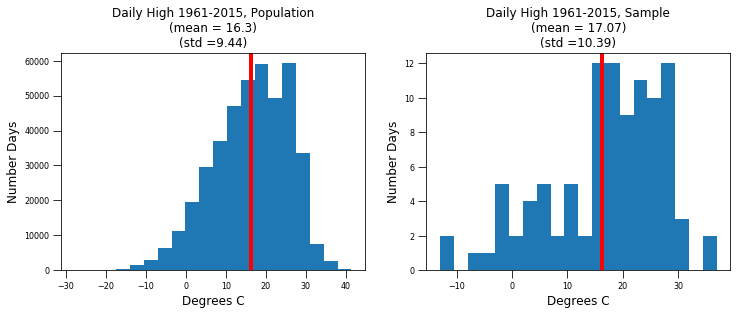

In [7]:
# T] plot side by side

random.seed(0)         
population = getHighs()
# sample without replacement
sample = random.sample(population, 100)

getMeansAndSDs(population, sample, True, True)

plt.show()

In [8]:
HTML('''
<hr>

Now let's draw 1000 samples of size 100
''')

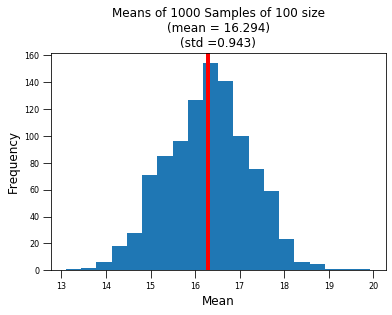

In [23]:
random.seed(0) 
population = getHighs()
sampleSize = 100
numSamples = 1000
sampleMeans = []
for i in range(numSamples):
    sample = random.sample(population, sampleSize)
    popMean, sampleMean, popSD, sampleSD =\
      getMeansAndSDs(population, sample, verbose = False)
    sampleMeans.append(sampleMean)

sm_mean = round(sum(sampleMeans)/len(sampleMeans), 3)
sm_std = round(numpy.std(sampleMeans), 3)
makeHist(sampleMeans, 'Means of '+str(numSamples)+' Samples of '+str(sampleSize)+' size' 
                          '\n(mean = '  + str(sm_mean) + ')'+\
                         '\n(std =' + str(sm_std) + ')','Mean', 'Frequency')
pylab.axvline(x = popMean, color = 'r')

plt.show()

In [24]:
HTML('''
<li> With 1000 samples, the distribution gets closer to population, central limit theorem holds true.
<li> 95% C.I. 
<br>    &emsp; &emsp; &emsp; = 16.29 +- (0.95 * 0.943)
<br>    &emsp; &emsp; &emsp; = 15.39 to 17.18 

<br>
<li> Standard deviation hardly changes with number of samples.


'''
)

In [25]:
HTML('''
<hr>
Let's analyze sample means and standard error of the mean for different sample sizes
'''
)

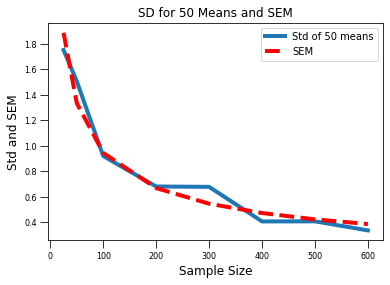

In [11]:
sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
    sems.append(sem(popSD, size))
    means = []
    for t in range(numTrials):
        sample = random.sample(population, size)
        means.append(sum(sample)/len(sample))
    sampleSDs.append(numpy.std(means))
pylab.plot(sampleSizes, sampleSDs,
          label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()
plt.show()

In [12]:
HTML(
'''
<li> CI gets tighter as sample size increases

''')

In [41]:
HTML('''
<hr>
<h3> Standard Error of the mean </h3>

<li> Standard deviation of the sampling distribution of the mean.

<li> Standard error of population mean = <b> Population S.D. / sprt(sample size)

''')

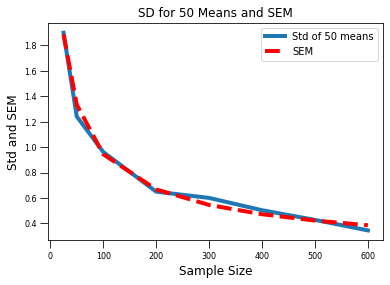

In [14]:
random.seed(0)

sampleSizes = (25, 50, 100, 200, 300, 400, 500, 600)
numTrials = 50
population = getHighs()
popSD = numpy.std(population)
sems = []
sampleSDs = []
for size in sampleSizes:
    sems.append(sem(popSD, size))
    means = []
    for t in range(numTrials):
        sample = random.sample(population, size)
        means.append(sum(sample)/len(sample))
    sampleSDs.append(numpy.std(means))
pylab.plot(sampleSizes, sampleSDs,
          label = 'Std of ' + str(numTrials) + ' means')
pylab.plot(sampleSizes, sems, 'r--', label = 'SEM')
pylab.xlabel('Sample Size')
pylab.ylabel('Std and SEM')
pylab.title('SD for ' + str(numTrials) + ' Means and SEM')
pylab.legend()
plt.show()

In [15]:
HTML(
'''
<hr>
<li> Std. Error we get by considering 1 sample and get std error from mean

<li> Std. DEV and  Std. Error get close as sample size increases

''')

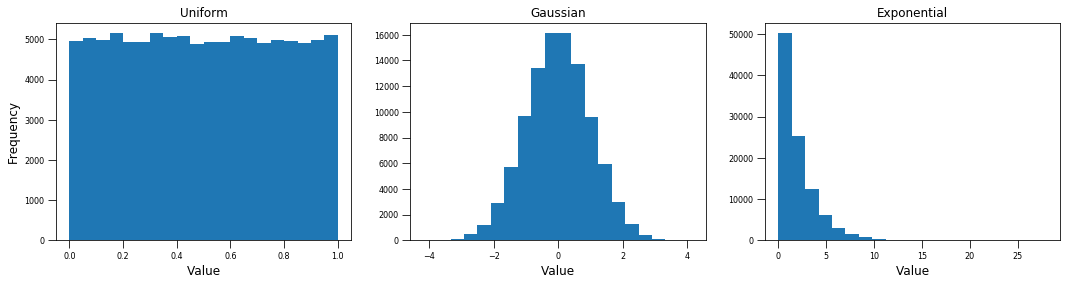

In [37]:
display(HTML('''
<hr>
<li> True for a different distribution of population?
<li> True for different size of population?
<br><br>
Consider 3 different distributions:
'''))


def plotDistributions():
    uniform, normal, exp = [], [], []
    for i in range(100000):
        uniform.append(random.random())
        normal.append(random.gauss(0, 1))
        exp.append(random.expovariate(0.5))
    plt.figure(figsize=(18,4))
    plt.subplot(131)
    makeHist(uniform, 'Uniform', 'Value', 'Frequency')
#     pylab.figure()
    plt.subplot(132)
    makeHist(normal, 'Gaussian', 'Value', '')
#     pylab.figure()
    plt.subplot(133)
    makeHist(exp, 'Exponential', 'Value', '')

plotDistributions()

In [17]:
HTML(
'''
<li> If populations is skewed, number of samples required is high</li>
<li> Sample size does not matter</li>

<hr>
<div dir = "rtl">
<ul style = 'list-style-type:square'>
<li> End of Document
</li>

'''

)

In [42]:
HTML('''<script>
$(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
 });
</script>
''')